In [ ]:
import pandas as pd

df=pd.read_csv('Du_lieu_dt_4.csv')
df['Gia']=df['Gia'].replace('[*₫Giá dự kiến: .]','',regex=True)
df['Gia']=pd.to_numeric(df['Gia']).astype(int)
df

Task: Calculate the revenue of each manufacturer, draw a business chart, which products have sold best since launch

Product has most sales is iPhone with 41631410000 sales


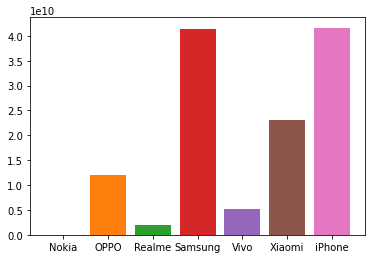

In [60]:
import numpy as np
import matplotlib.pyplot as plt

df['Sales']=df['Gia']*df['So Luong']
df.head()
sale_values=df.groupby('Brand').sum()['Sales']
for i,y in sale_values.items():
    plt.bar(i,y)
    if y==sale_values.max():
        print('Product has most sales is',i,'with',y,'sales')

